# Spam Message Classification

# 1) Data Preprocessing

In [10]:
import numpy as np #for arrays and matrix manipulation
import pandas as pd #for excel to convert into python dataframe to manippulate
import matplotlib.pyplot as plt #plot graphs FROM pandas dataframe

In [11]:
df = pd.read_csv('spam.tsv', sep='\t')

In [12]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [13]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [14]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [15]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [16]:
df['label'].value_counts()/ (len(df))

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [17]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [18]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [19]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [20]:
ham = ham.sample(spam.shape[0])

In [21]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [22]:
data = ham.append(spam, ignore_index=True)

In [23]:
data.shape

(1494, 4)

In [24]:
data['label'].value_counts()

spam    747
ham     747
Name: label, dtype: int64

In [25]:
data.head()

,label,message,length,punct
0,ham,No probs hon! How u doinat the mo?,34,2
1,ham,"Omw back to tampa from west palm, you hear wha...",57,2
2,ham,"Cool, I'll text you when I'm on the way",39,3
3,ham,Just checking in on you. Really do miss seeing...,78,2
4,ham,Really dun bluff me leh... U sleep early too. ...,53,7


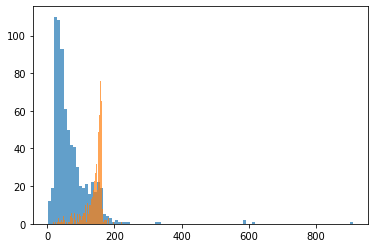

In [26]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

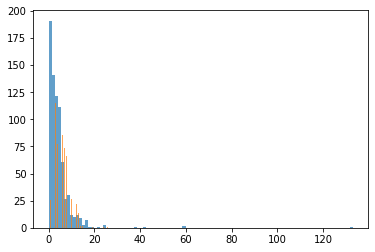

In [27]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

In [28]:
data

,label,message,length,punct
0,ham,No probs hon! How u doinat the mo?,34,2
1,ham,"Omw back to tampa from west palm, you hear wha...",57,2
2,ham,"Cool, I'll text you when I'm on the way",39,3
3,ham,Just checking in on you. Really do miss seeing...,78,2
4,ham,Really dun bluff me leh... U sleep early too. ...,53,7
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [30]:
!pip install sklearn
from sklearn.model_selection import train_test_split #for machine learning (train-test)

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=39f300ad75a02c42ca99c89e1d61bf0b80f140b6c9cbbfd97adc9e6d21ac6e23
  Stored in directory: c:\users\shiva\appdata\local\pip\cache\wheels\23\9d\42\5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


In [31]:
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], test_size = 0.3, random_state =0, shuffle = True)

In [32]:
1494 * 0.3

448.2

In [ ]:
X_train.shape

(1045,)

In [ ]:
X_test.shape

(449,)

# 2) Building the Model (Random Forest)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [ ]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [ ]:
classifier.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

# 3) Predicting the results (Random Forest)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_test, y_pred

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # measurement metrics of th model

In [ ]:
accuracy_score(y_test, y_pred)

0.9465478841870824

In [ ]:
0.9465478841870824 * 449

425.0

In [ ]:
confusion_matrix(y_test, y_pred)

array([[226,   1],
       [ 23, 199]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       227
        spam       0.99      0.90      0.94       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449

